In [1]:
from bs4 import BeautifulSoup
import requests
import csv

In [3]:
general = requests.get('https://www.yelp.com/browse/reviews/picks').text

In [11]:
text = BeautifulSoup(general,'html5lib')

In [13]:
section = text.find('div', class_ ='content-container')
lists = section.find('div', class_ = 'review-list review-list-wide')
ul = lists.find('ul', class_ = 'ylist ylist-bordered reviews')
li = ul.find('li')


file = open('analysis_data.csv', 'w',  encoding="utf-8")
file_writer = csv.writer(file)
file_writer.writerow(['Resturant_Name','reviews'])

for li in ul.find_all('li'):
    # This gets the name of the resturant.
    try:
        
        div = li.find('div', class_ ="review review--with-sidebar")
        hold =  div.find('div',class_  = 'review-wrapper')
        para = hold.p
        name = para.find('a', class_="biz-name js-analytics-click" ).text

    
    except Exception as e:
        resturant_name = None
        
        print()
        
    content = hold.find('div', class_ ="review-content")
    content_para = content.p.text
      
    print()
    
    file_writer.writerow([name, content_para])
file.close()

# When scraping the review page I noticed it printed more than one resturant name and review.

In [1]:
import pandas as pd

In [2]:
analysis = pd.read_csv('analysis_data.csv')
analysis.shape

(160, 2)

In [3]:
# checking the amount of duplicates
analysis.duplicated().sum()

150

In [4]:
# removing the duplicates
analysis.drop_duplicates(inplace = True)

In [5]:
analysis.head()

,Resturant_Name,reviews
0,Swan Oyster Depot,After nearly 2.5 years of living less than 10 ...
16,ROOH,There's been a new wave of contemporary Indian...
32,Pizza Squared,I've never had Detroit style pizza before! I'm...
48,jū-ni,My best omakase experience to date and a Miche...
64,Corner Bakery Cafe,Our office ordered lunch for us from Corner Ba...


# Using Regular expression

In [7]:
import re

for i in analysis['reviews']:
    hold = re.findall('\w+', i)
    print(hold)

['After', 'nearly', '2', '5', 'years', 'of', 'living', 'less', 'than', '10', 'minutes', 'walking', 'distance', 'from', 'Swan', 'Oyster', 'Depot', 'I', 'FINALLY', 'made', 'it', 'to', 'this', 'iconic', 'SF', 'spot', 'I', 'will', 'say', 'that', 'we', 'severely', 'underestimated', 'the', 'wait', 'time', 'We', 'arrived', 'at', '1pm', 'on', 'Friday', 'and', 'waited', 'for', '1', '5', 'hours', 'I', 'probably', 'will', 'not', 'be', 'doing', 'this', 'again', 'anytime', 'soon', 'unless', 'I', 'm', 'waiting', 'for', 'their', 'fresh', 'uni', 'which', 'they', 'didn', 't', 'have', 'this', 'time', 'around', 'bummer', 'For', 'two', 'we', 'ordered', 'dozen', 'mixed', 'oysters', '6', 'types', 'I', 'liked', 'these', 'smoked', 'salmon', 'THEE', 'best', 'smoked', 'salmon', 'in', 'SF', 'comparable', 'to', 'Russ', 'Daughters', 'in', 'NY', 'which', 'has', 'amazing', 'smoked', 'salmon', 'smoked', 'trout', 'and', 'smoked', 'white', 'fish', 'I', 'preferred', 'the', 'salmon', 'but', 'this', 'was', 'good', 'as', '

In [8]:
for i in analysis['reviews']:
    hold = re.findall('[a-z]+b$', i)
    print(hold)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [9]:
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
over_view = []

for line in analysis['reviews']:
    polarity_score = sia.polarity_scores(line)
    polarity_score['review'] = line
    over_view.append(polarity_score)
    
over_view

C:\Users\Kenechi\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[{'neg': 0.015,
  'neu': 0.835,
  'pos': 0.15,
  'compound': 0.9846,
  'review': "After nearly 2.5 years of living less than 10 minutes walking distance from Swan Oyster Depot, I FINALLY made it to this iconic SF spot. I will say that we severely underestimated the wait time. We arrived at 1pm on Friday and waited for 1.5 hours. I probably will not be doing this again anytime soon, unless I'm waiting for their fresh uni (which they didn't have this time around, bummer). For two, we ordered: - dozen mixed oysters: 6 types, I liked these - smoked salmon: THEE best smoked salmon in SF, comparable to Russ & Daughters in NY which has amazing smoked salmon- smoked trout and smoked white fish: I preferred the salmon, but this was good as well - Sicilian sashimi: my first time having sashimi with olive oil, onions and capers. This was really good, my absolute favorite were the scallops which we ended up ordering more of. GET THE SCALLOPS! - Scallops: So buttery, get the Sicilian style over the

# Compound gives a signle value Sentiment score between -1 and 1, where -1 = extremely negative and 1 = extremely postive

In [10]:
# converting to a pandas dataframe
analysis = pd.DataFrame.from_records(over_view)
analysis.head()

,compound,neg,neu,pos,review
0,0.9846,0.015,0.835,0.150,After nearly 2.5 years of living less than 10 ...
1,0.9984,0.027,0.788,0.185,There's been a new wave of contemporary Indian...
2,0.9966,0.048,0.647,0.305,I've never had Detroit style pizza before! I'm...
3,0.9869,0.012,0.772,0.216,My best omakase experience to date and a Miche...
4,0.9555,0.063,0.771,0.165,Our office ordered lunch for us from Corner Ba...


# from looking at the compound values the data is highly positive.

In [11]:
analysis['label'] = 0
analysis.loc[analysis['compound'] > 0.2, 'label'] = 1
analysis.loc[analysis['compound'] < -0.2, 'label'] = -1
analysis.head()

,compound,neg,neu,pos,review,label
0,0.9846,0.015,0.835,0.150,After nearly 2.5 years of living less than 10 ...,1
1,0.9984,0.027,0.788,0.185,There's been a new wave of contemporary Indian...,1
2,0.9966,0.048,0.647,0.305,I've never had Detroit style pizza before! I'm...,1
3,0.9869,0.012,0.772,0.216,My best omakase experience to date and a Miche...,1
4,0.9555,0.063,0.771,0.165,Our office ordered lunch for us from Corner Ba...,1


In [12]:
data = analysis[['review', 'label']]
data.to_csv('review.csv', mode = 'a', encoding='utf-8', index=False)
data.head(5)

,review,label
0,After nearly 2.5 years of living less than 10 ...,1
1,There's been a new wave of contemporary Indian...,1
2,I've never had Detroit style pizza before! I'm...,1
3,My best omakase experience to date and a Miche...,1
4,Our office ordered lunch for us from Corner Ba...,1


In [13]:
print("Positive reviews:\n")
print(list(data[data['label'] ==1].review)[:3])

print("\nNegative reviews:\n")
print(list(data[data['label'] ==-1].review)[:3])


Positive reviews:

["After nearly 2.5 years of living less than 10 minutes walking distance from Swan Oyster Depot, I FINALLY made it to this iconic SF spot. I will say that we severely underestimated the wait time. We arrived at 1pm on Friday and waited for 1.5 hours. I probably will not be doing this again anytime soon, unless I'm waiting for their fresh uni (which they didn't have this time around, bummer). For two, we ordered: - dozen mixed oysters: 6 types, I liked these - smoked salmon: THEE best smoked salmon in SF, comparable to Russ & Daughters in NY which has amazing smoked salmon- smoked trout and smoked white fish: I preferred the salmon, but this was good as well - Sicilian sashimi: my first time having sashimi with olive oil, onions and capers. This was really good, my absolute favorite were the scallops which we ended up ordering more of. GET THE SCALLOPS! - Scallops: So buttery, get the Sicilian style over the ponzu style- octopus salad: I would pass on this Total with 

In [14]:
print(data.label.value_counts())

print(data.label.value_counts(normalize = True) * 100)


1    10
Name: label, dtype: int64
1    100.0
Name: label, dtype: float64


# from what we can see the data is postive only

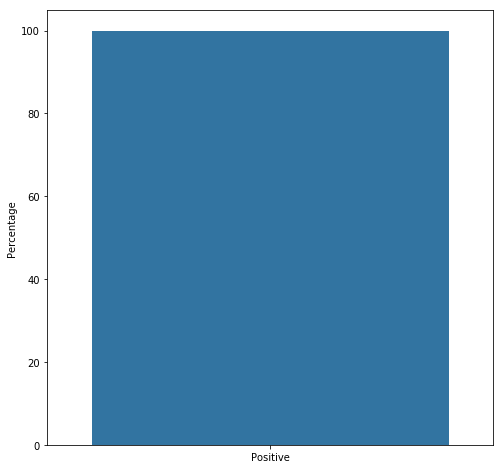

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

counts = data.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [18]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
#nltk.download('stopwords')
tokenizer = RegexpTokenizer(r'\w+')
stopwords = stopwords.words('english')

In [19]:
postive_words = list(data[data.label == 1]. review)

In [20]:
tokens = []
for words in postive_words:
    token = tokenizer.tokenize(words)
    token = [t.lower() for t in token if t.lower() not in stopwords]
    tokens.extend(token) # adds the content of a list into another list

In [21]:
tokens

['nearly',
 '2',
 '5',
 'years',
 'living',
 'less',
 '10',
 'minutes',
 'walking',
 'distance',
 'swan',
 'oyster',
 'depot',
 'finally',
 'made',
 'iconic',
 'sf',
 'spot',
 'say',
 'severely',
 'underestimated',
 'wait',
 'time',
 'arrived',
 '1pm',
 'friday',
 'waited',
 '1',
 '5',
 'hours',
 'probably',
 'anytime',
 'soon',
 'unless',
 'waiting',
 'fresh',
 'uni',
 'time',
 'around',
 'bummer',
 'two',
 'ordered',
 'dozen',
 'mixed',
 'oysters',
 '6',
 'types',
 'liked',
 'smoked',
 'salmon',
 'thee',
 'best',
 'smoked',
 'salmon',
 'sf',
 'comparable',
 'russ',
 'daughters',
 'ny',
 'amazing',
 'smoked',
 'salmon',
 'smoked',
 'trout',
 'smoked',
 'white',
 'fish',
 'preferred',
 'salmon',
 'good',
 'well',
 'sicilian',
 'sashimi',
 'first',
 'time',
 'sashimi',
 'olive',
 'oil',
 'onions',
 'capers',
 'really',
 'good',
 'absolute',
 'favorite',
 'scallops',
 'ended',
 'ordering',
 'get',
 'scallops',
 'scallops',
 'buttery',
 'get',
 'sicilian',
 'style',
 'ponzu',
 'style',
 '

In [22]:
# removing all digits
new_tokens = []
for words in tokens:
    hold = re.sub('\d+', '', words)
    new_tokens.append(hold)
       
new_tokens
       


['nearly',
 '',
 '',
 'years',
 'living',
 'less',
 '',
 'minutes',
 'walking',
 'distance',
 'swan',
 'oyster',
 'depot',
 'finally',
 'made',
 'iconic',
 'sf',
 'spot',
 'say',
 'severely',
 'underestimated',
 'wait',
 'time',
 'arrived',
 'pm',
 'friday',
 'waited',
 '',
 '',
 'hours',
 'probably',
 'anytime',
 'soon',
 'unless',
 'waiting',
 'fresh',
 'uni',
 'time',
 'around',
 'bummer',
 'two',
 'ordered',
 'dozen',
 'mixed',
 'oysters',
 '',
 'types',
 'liked',
 'smoked',
 'salmon',
 'thee',
 'best',
 'smoked',
 'salmon',
 'sf',
 'comparable',
 'russ',
 'daughters',
 'ny',
 'amazing',
 'smoked',
 'salmon',
 'smoked',
 'trout',
 'smoked',
 'white',
 'fish',
 'preferred',
 'salmon',
 'good',
 'well',
 'sicilian',
 'sashimi',
 'first',
 'time',
 'sashimi',
 'olive',
 'oil',
 'onions',
 'capers',
 'really',
 'good',
 'absolute',
 'favorite',
 'scallops',
 'ended',
 'ordering',
 'get',
 'scallops',
 'scallops',
 'buttery',
 'get',
 'sicilian',
 'style',
 'ponzu',
 'style',
 'octopus'

In [23]:
positive_freq = nltk.FreqDist(tokens)
positive_freq.most_common(10)

[('good', 14),
 ('time', 11),
 ('much', 11),
 ('one', 11),
 ('food', 10),
 ('chicken', 9),
 ('really', 8),
 ('ordered', 7),
 ('place', 7),
 ('indian', 7)]

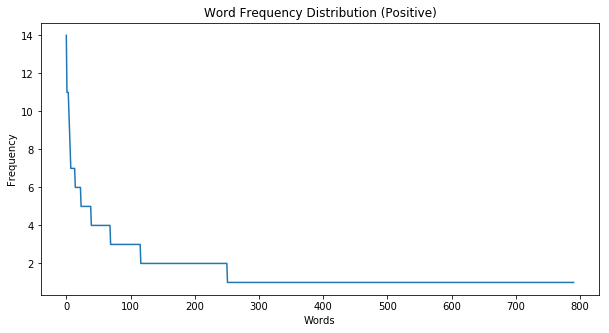

In [24]:
y_val = [x[1] for x in positive_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title("Word Frequency Distribution (Positive)")
plt.show()